## Least-Square Fitting ##

Using temperature from the Moss Landing Marine Labs seawater intake, we want to fit a line to the data to look at the trend and rate of increase in temperature over a couple of days.

- `temp` is the de-tided temperature.
- `raw` is the raw temperature with the tidal signal
- `hours` are the number hours ellapsed



In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('./sea_temp.csv')
df.head()

temp        raw  hours
0  13.709747  13.452097    0.0
1  13.721395  13.118691    1.0
2  13.738135  12.701689    2.0
3  13.755779  12.423057    3.0
4  13.772937  12.368149    4.0

Text(0.5, 0, 'Hours Ellapsed')

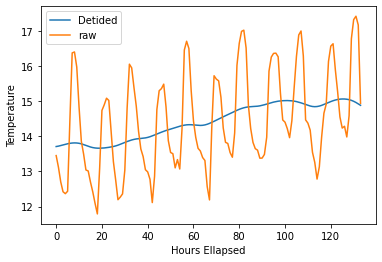

In [96]:
x = df["hours"].values
y = df["temp"].values
raw = df["raw"].values



fig, ax = plt.subplots()
ax.plot(x, y, label='Detided', markersize=10)
ax.plot(x, raw, label='raw', markersize=10)
ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Hours Ellapsed")

__What could a linear regression tell us about this data?__
- The rate of increase in Temperature (aka the slope)


We can use __Least Square Fitting__ to find the optimal curve (or line) to fit some data. This works by reducing the sum of squares of the residual (difference between the curve/line and the data) 

[See explaination in Wolfram](https://mathworld.wolfram.com/LeastSquaresFitting.html)


To start, we need to create a coefficient matrix, called `A` that represents the type of curve we want to fit.  
A first order polynomial (line) would have the `y = ax**0 + ax**1`, so we need to create an array that is `(len(x),2)` where one column is `x**0` aka all 1s and the other is `x**1`, aka x. __If we wanted to go to a hirer order, we could add another column that was `x**2`__.

In [97]:
A = np.array(np.vstack(([x**0], [x**1]))).T
print(A.shape)

(134, 2)


Now lets use [np.linalg.lstsq()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) to solve for the equation.

What we really care about here is the `p_estimate`, which will have two numbers (aka our slope and intercept)

In [98]:
p_estimate, residual, rank, s = np.linalg.lstsq(A, y, rcond=None)
print(p_estimate)

[1.35805540e+01 1.24722515e-02]


For clarity, assign those to their own variables.

We also need to create a function that applies that line to the hour data.

In [99]:
intercept = p_estimate[0]
slope = p_estimate[1]

def linear_model(x,m,b):
    """ 1rd order polynomial function aka a line"""
    return m * x + b

__Now plot it all__

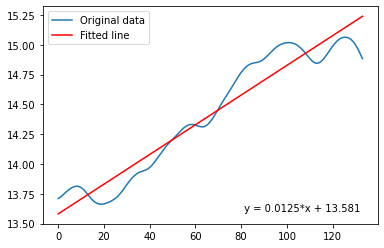

In [100]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Original data', markersize=10)
ax.plot(x, model(x,slope,intercept), 'r', label='Fitted line')
ax.text(x=80,y=13.6, s=f" y = {round(slope,4)}*x + {round(intercept,3)}")
ax.legend()

__Now lets do the same with the raw data__

/var/folders/wg/5wjdpvd518dft0bjkj1t1s1h0000gn/T/ipykernel_3783/2836137761.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, model(x,slope,intercept), 'r', label='detided line',color='#E5913D',ls='dashed',lw=2)
/var/folders/wg/5wjdpvd518dft0bjkj1t1s1h0000gn/T/ipykernel_3783/2836137761.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, model(x,slope_raw,intercept_raw), 'k', label='raw line',color='#5A86B9',ls='dashed',lw=2)


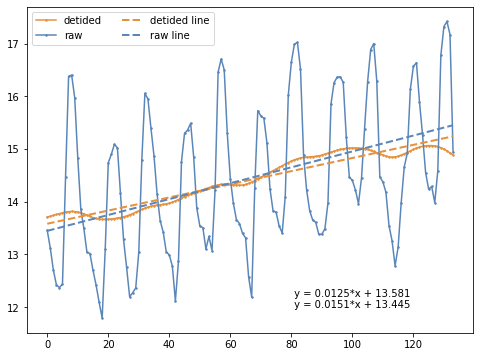

In [119]:
p_estimate_raw, residual, rank, s = np.linalg.lstsq(A, raw, rcond=None)
intercept_raw = p_estimate_raw[0]
slope_raw = p_estimate_raw[1]

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.plot(x, y, label='detided', markersize=3,color='#E5913D', marker='.')
ax.plot(x, raw, label='raw', markersize=3, color='#5A86B9', marker='.')

ax.plot(x, model(x,slope,intercept), 'r', label='detided line',color='#E5913D',ls='dashed',lw=2)
ax.plot(x, model(x,slope_raw,intercept_raw), 'k', label='raw line',color='#5A86B9',ls='dashed',lw=2)

ax.text(x=80,y=12.2, s=f" y = {round(slope,4)}*x + {round(intercept,3)}")
ax.text(x=80,y=12, s=f" y = {round(slope_raw,4)}*x + {round(intercept_raw,3)}")

ax.legend(ncol=2)

__Now try it with a second order polynomial__

In [120]:
A = np.array(np.vstack(([x**0], [x**1], [x**2]))).T
poly2, residual, rank, s = np.linalg.lstsq(A, y, rcond=None)
def poly_model(x,p):
    """ 1rd order polynomial function aka a line"""
    return p[0] + p[1]*x + p[2] * x**2

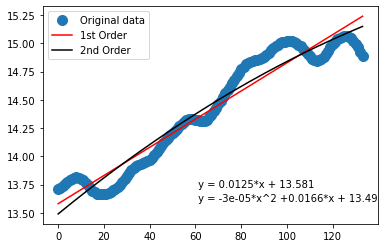

In [121]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='Original data', markersize=10)
ax.plot(x, model(x,slope,intercept), 'r', label='1st Order')
ax.plot(x, poly_model(x,poly2), 'k', label='2nd Order')
ax.text(x=60,y=13.73, s=f" y = {round(slope,4)}*x + {round(intercept,3)}")
ax.text(x=60,y=13.6, s=f" y = {round(poly2[2],5)}*x^2 +{round(poly2[1],4)}*x + {round(poly2[0],3)}")
ax.legend()